## Digits Classification Model By Alan Altonchi
**Day 3 of learning how to use TensorFlow and what Machine Learning is**

Dataset: https://keras.io/api/datasets/mnist/

This is a **Multi-Class Classification**, the input is a digit from `0-9`, the output is what the model predicts the digit to be which is can be anything between `0` and `9`

**Introduction:** Hello, my name is Alan, I am a passionate self-taught programmer that loves learning new things. This is my journey as I'm learning about **Machine Learning** and how to make use of its subfield **Deep Learning**. I will do so by learning how to use **TensorFlow** from scratch.

## Imports

In [146]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, losses, optimizers, callbacks, layers
import matplotlib.pyplot as plt
import random
import pandas as pd

## Gather data

In [147]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data(path="mnist.npz")

## Helpful Functions

In [174]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    cm = confusion_matrix(y_true, y_pred) 
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
    
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshhold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshhold else "black",
                size=text_size)

## Visualize data

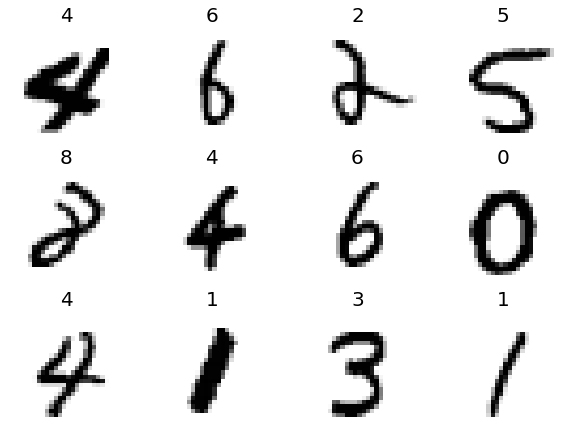

In [145]:
plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(4, 4, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(train_labels[rand_index], fontsize=20)
    plt.axis(False)

## Data properties

In [28]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

## Create model

In [149]:
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(loss=losses.SparseCategoricalCrossentropy(),
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

Fitting the model (pre-normalization)

In [150]:
history_non_norm = model.fit(train_data, 
                             train_labels, 
                             epochs=10, 
                             validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3439 - accuracy: 0.1671 - val_loss: 2.0296 - val_accuracy: 0.2037
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0111 - accuracy: 0.2103 - val_loss: 1.9921 - val_accuracy: 0.2164
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9767 - accuracy: 0.2227 - val_loss: 1.9133 - val_accuracy: 0.2558
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7496 - accuracy: 0.2849 - val_loss: 1.5907 - val_accuracy: 0.3234
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5101 - accuracy: 0.3751 - val_loss: 1.3604 - val_accuracy: 0.4676
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2588 - accuracy: 0.5217 - val_loss: 1.1985 - val_accuracy: 0.5738
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1549 - accuracy: 0.5929 - val_loss: 1.1113 - val_accuracy:

In [153]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.0553 - accuracy: 0.6516


[1.0552864074707031, 0.6516000032424927]

### Normalize the data

In [35]:
# Get the max values
train_data.max(), test_data.max() 

(255, 255)

In [46]:
# Divide by the max values
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

## Re-create the model and fit the normalized data

In [151]:
model_norm = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model_norm.compile(loss=losses.SparseCategoricalCrossentropy(),
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [152]:
history_norm = model_norm.fit(train_data_norm, 
                         train_labels, 
                         epochs=10,
                         validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9878 - accuracy: 0.6733 - val_loss: 0.5008 - val_accuracy: 0.9001
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3578 - accuracy: 0.9237 - val_loss: 0.2943 - val_accuracy: 0.9388
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2358 - accuracy: 0.9466 - val_loss: 0.2290 - val_accuracy: 0.9484
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1813 - accuracy: 0.9566 - val_loss: 0.2067 - val_accuracy: 0.9526
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1393 - accuracy: 0.9651 - val_loss: 0.1667 - val_accuracy: 0.9575
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1082 - accuracy: 0.9708 - val_loss: 0.1518 - val_accuracy: 0.9624
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0886 - accuracy: 0.9758 - val_loss: 0.1586 - val_accuracy:

In [154]:
model.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 4.4353 - accuracy: 0.0980


[4.435294151306152, 0.09799999743700027]

#### Visualize a comparison between non-normalized and normalized results

<AxesSubplot:title={'center':'Normalized'}, xlabel='epochs'>

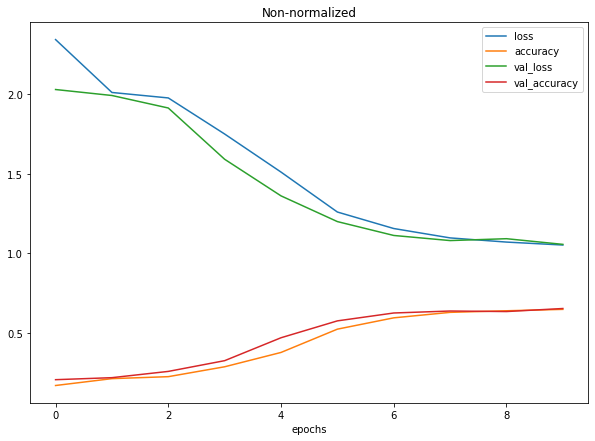

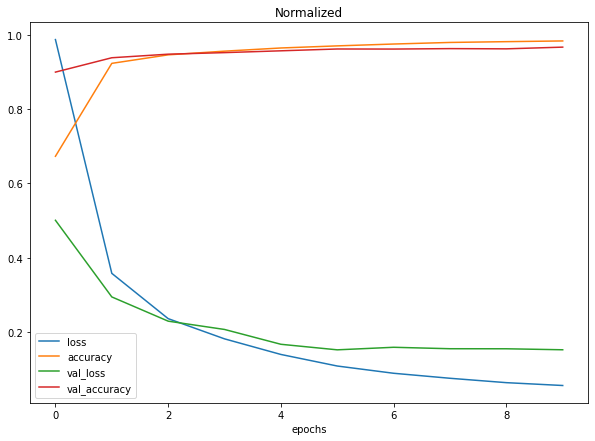

In [159]:
pd.DataFrame(history_non_norm.history).plot(figsize=(10, 7), xlabel="epochs", title="Non-normalized")
pd.DataFrame(history_norm.history).plot(figsize=(10, 7), xlabel="epochs", title="Normalized")

### Visualize multiple random predictions

Non-normalized Data

313/313 [==============================] - 0s 660us/step


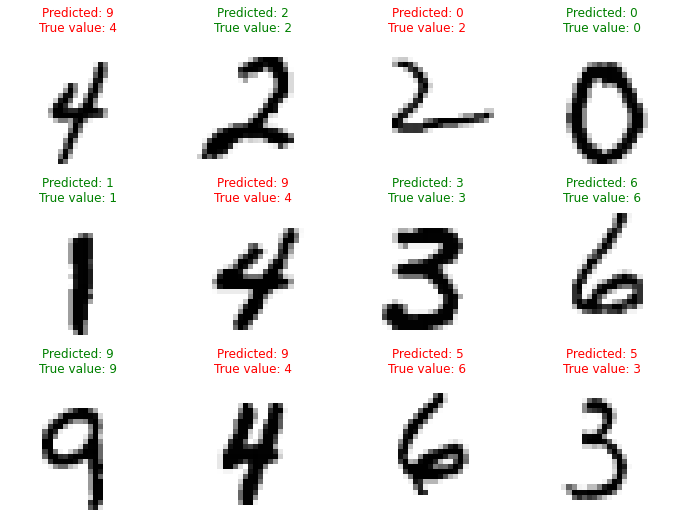

In [165]:
predictions = model.predict(test_data)
plt.figure(figsize=(12, 12))
for i in range(12):
    index = random.randrange(0, len(test_data))
    ax = plt.subplot(4, 4, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(test_data[index], cmap=plt.cm.binary)
    plt.title(f"Predicted: {tf.argmax(predictions[index])}\nTrue value: {test_labels[index]}", color="g" if test_labels[index] == tf.argmax(predictions[index]) else "r")
    plt.axis(False)

Normalized Data

313/313 [==============================] - 0s 657us/step


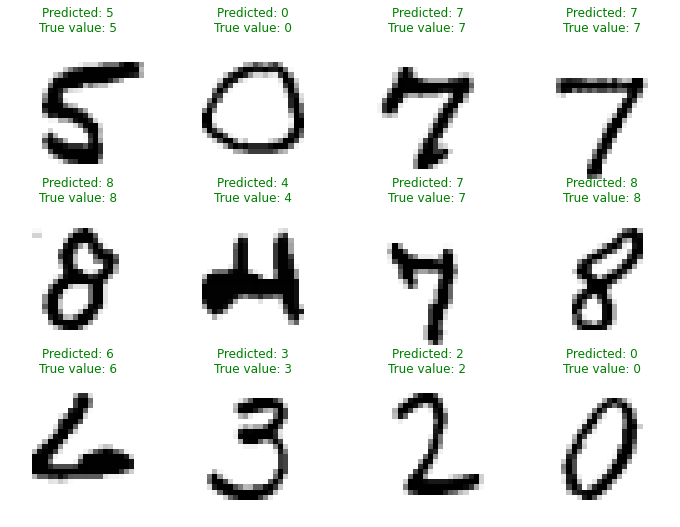

In [164]:
predictions = model_norm.predict(test_data_norm)
plt.figure(figsize=(12, 12))
for i in range(12):
    index = random.randrange(0, len(test_data_norm))
    ax = plt.subplot(4, 4, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(test_data_norm[index], cmap=plt.cm.binary)
    plt.title(f"Predicted: {tf.argmax(predictions[index])}\nTrue value: {test_labels[index]}", color="g" if test_labels[index] == tf.argmax(predictions[index]) else "r")
    plt.axis(False)

## Confusion Matrix

Non-normalized Data

313/313 [==============================] - 0s 728us/step


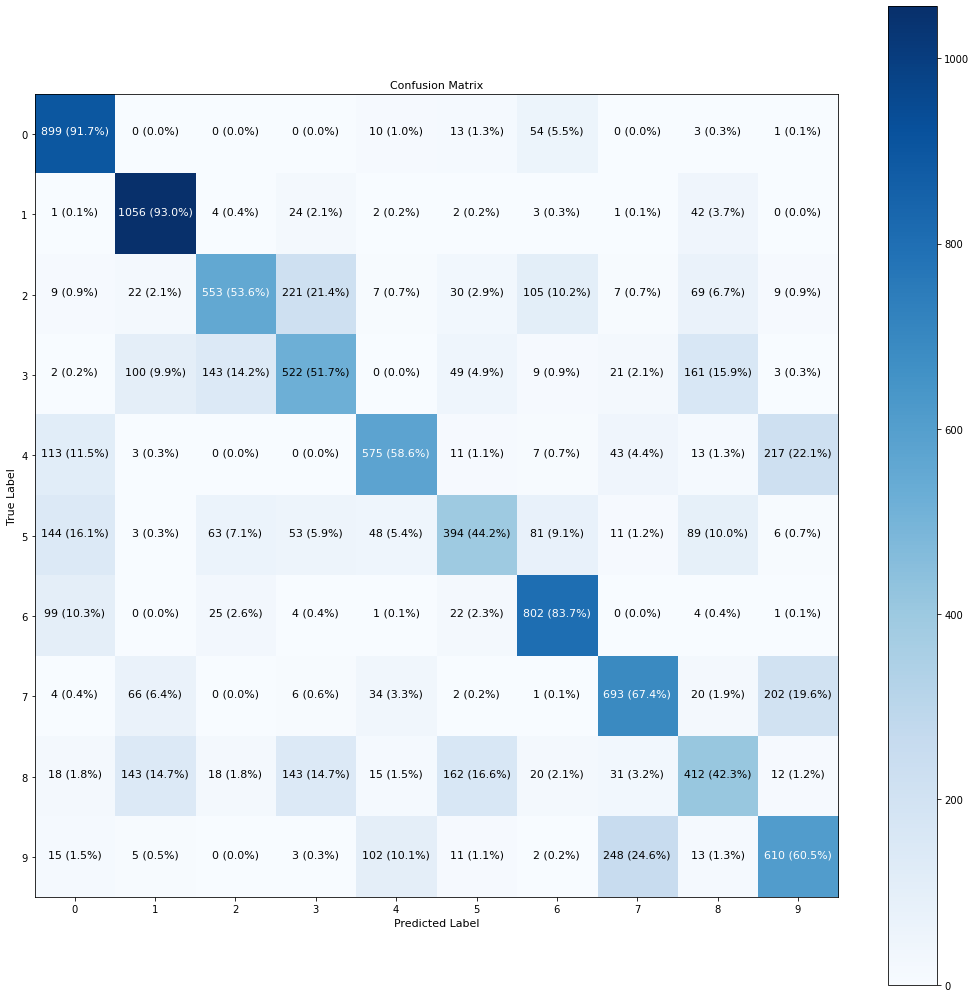

In [185]:
y_probs = model.predict(test_data)
y_preds = y_probs.argmax(axis=1)
make_confusion_matrix(test_labels, y_preds, [0,1,2,3,4,5,6,7,8,9],figsize=(18,18), text_size=11)

Normalized Data

313/313 [==============================] - 0s 789us/step


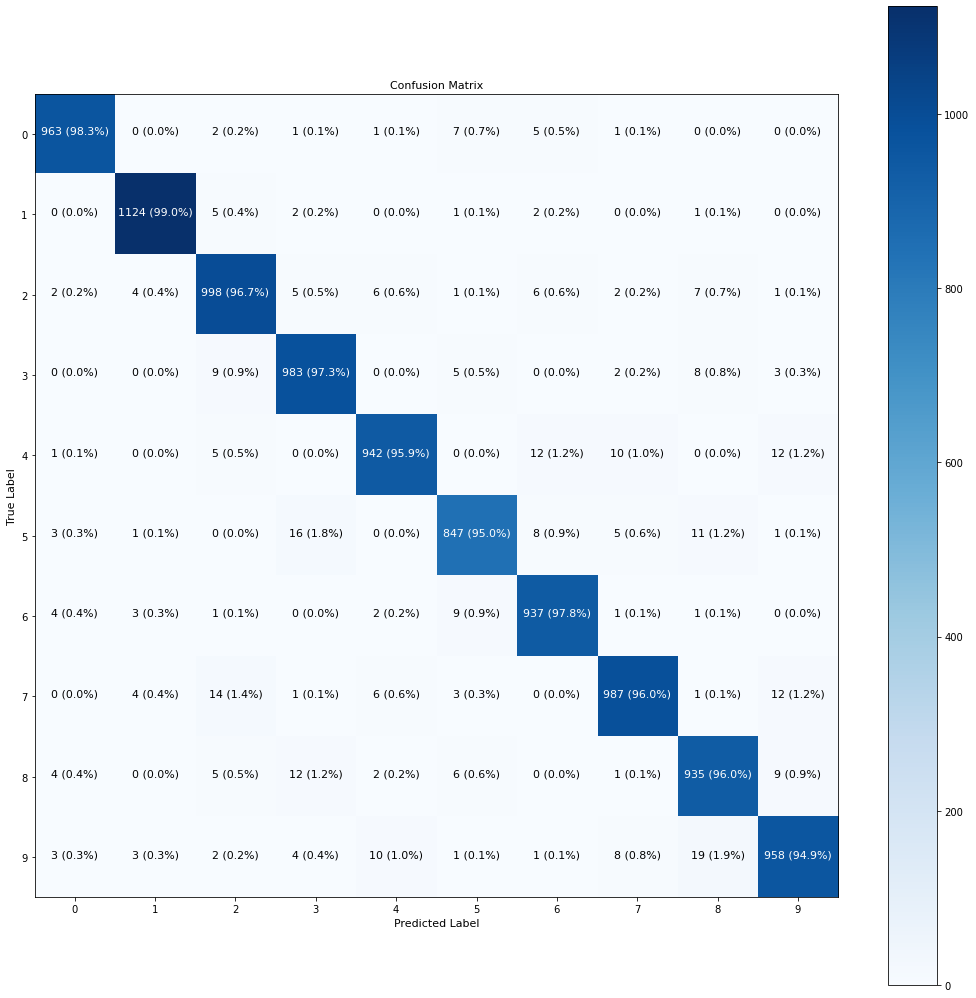

In [184]:
y_probs = model_norm.predict(test_data_norm)
y_preds = y_probs.argmax(axis=1)
make_confusion_matrix(test_labels, y_preds, [0,1,2,3,4,5,6,7,8,9],figsize=(18,18), text_size=11)